In [34]:
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv
import os
load_dotenv()

if os.environ['OPENAI_API_KEY']:
    print("OpenAI API Key is set.")
else:
    raise ValueError("OpenAI API Key is not set.")

OpenAI API Key is set.


In [35]:
llm = ChatOpenAI(model="gpt-5-nano")
llm.invoke("I want to know the meaning of water").content


'Do you want a quick definition, or a deeper explanation (scientific, cultural, or symbolic)? Here are a few ways to think about "water":\n\n- Quick dictionary-style definition:\n  Water is a chemical substance with the formula H2O, consisting of two hydrogen atoms bonded to one oxygen atom. It is essential for all known life and, at standard conditions, a colorless, tasteless, odorless liquid.\n\n- Scientific basics:\n  - Properties: Water is a polar molecule, a good solvent, and it forms hydrogen bonds. It has a high heat capacity and heat of vaporization, a high surface tension, and its solid form (ice) is less dense than its liquid form, so ice floats.\n  - Phases: It exists as solid (ice), liquid (water), and gas (steam) depending on temperature and pressure.\n  - Water cycle: Evaporation, condensation, precipitation, and collection/infiltration keep fresh water moving around the planet.\n\n- Importance:\n  - Life: Water is essential for metabolism, hydration, and as a medium for 

# **First Graph**

### **Step-1: Define The Schema**

In [36]:
from typing import TypedDict, List

class graph_schema(TypedDict):
    name : str
    message : str

### **Step-2: Create The Node Functions**

In [37]:
def welcome(schema:graph_schema) -> graph_schema:

    curr_name = schema['name']
    curr_message = schema['message']

    response = llm.invoke(f"My name is {curr_name}. {curr_message}").content

    schema['message'] = f"Your message was {curr_message}. Here's my response:  {response}"

    return schema


### **Step-3: Create The State Graph**

In [38]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(graph_schema)

# Adding Nodes
graph.add_node("welcome", welcome)

# Adding Edges
graph.add_edge(START, "welcome")
graph.add_edge("welcome", END)



### **Step-4 Compile The Graph**


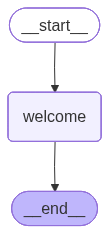

In [39]:
from IPython.display import Image, display

first_graph = graph.compile()

# You could see the errors with the below command
Image(first_graph.get_graph().draw_mermaid_png())

# You can use the below command to see the graph without errors
# print(first_graph.get_graph().draw_mermaid())

### **Step-5: Run The Graph**

In [40]:
first_graph.invoke({"name":"Ansh","message":"How are you?"})

{'name': 'Ansh',
 'message': "Your message was How are you?. Here's my response:  Hi Ansh! Nice to meet you. I’m here and ready to help—how can I assist you today?"}